# Project - Case Ambev

## Libraries importation

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from pycaret.classification import *

## File extraction

In [92]:
df = pd.read_json('data/dataset.json')

## Initial exploratory analysis

In [93]:
df.head(50)

,customer_code,branch_id,sales_channel,seller_code,register_date,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn
0,143,0,0,190,2017-11-10T00:00:00Z,1613.53,21804,10,854,292.91,25.04,0,0,0.0
1,433,0,1,153,2011-05-16T00:00:00Z,11163.69,5486,20,246,287.19,12.33,0,5,0.0
2,486,0,0,166,2018-01-24T00:00:00Z,6432.12,22662,12,1420,184.84,12.80,0,0,0.0
3,107,0,1,156,2010-07-28T00:00:00Z,831.82,3956,18,1963,189.18,10.51,0,0,0.0
4,768,0,1,218,2010-12-17T00:00:00Z,1736.48,4730,5,1786,66.87,11.82,0,0,0.0
5,740,0,8,213,2009-05-07T00:00:00Z,445.10,1835,10,2854,226.80,21.60,0,0,0.0
6,58,0,0,179,2013-12-17T00:00:00Z,573.06,11450,6,246,105.51,15.68,0,0,0.0
7,408,0,1,199,2009-09-29T00:00:00Z,1201.44,2504,6,1842,34.26,5.71,0,0,0.0
8,25,0,0,94,2017-11-09T00:00:00Z,1397.78,21773,10,1767,482.60,48.26,0,0,0.0
9,58,0,1,179,2008-08-19T00:00:00Z,2687.76,843,2,410,66.42,31.63,0,0,0.0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204428 entries, 0 to 204427
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   customer_code     204428 non-null  int64  
 1   branch_id         204428 non-null  int64  
 2   sales_channel     204428 non-null  int64  
 3   seller_code       204428 non-null  int64  
 4   register_date     204428 non-null  object 
 5   total_price       204428 non-null  float64
 6   order_id          204428 non-null  int64  
 7   quantity          204428 non-null  int64  
 8   item_code         204428 non-null  int64  
 9   item_total_price  204428 non-null  float64
 10  unit_price        204428 non-null  float64
 11  group_code        204428 non-null  int64  
 12  segment_code      204428 non-null  int64  
 13  is_churn          202513 non-null  float64
dtypes: float64(4), int64(9), object(1)
memory usage: 21.8+ MB


In [95]:
df.describe()

,customer_code,branch_id,sales_channel,seller_code,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn
count,204428.000000,204428.0,204428.000000,204428.000000,204428.000000,204428.000000,204428.000000,204428.000000,204428.000000,204428.000000,204428.000000,204428.000000,202513.000000
mean,447.489062,0.0,1.761182,145.543022,5337.072931,12434.088863,12.332694,1437.298981,304.048244,47.456664,0.307184,0.846381,0.191168
std,246.678026,0.0,2.929541,75.197609,21268.855032,6935.623011,53.299314,903.166319,1009.268287,145.295694,0.714639,1.615763,0.393222
min,0.000000,0.0,0.000000,0.000000,0.010000,0.000000,1.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
25%,221.000000,0.0,0.000000,83.000000,1180.470000,6497.750000,3.000000,631.000000,79.600000,14.670000,0.000000,0.000000,0.000000
50%,486.000000,0.0,0.000000,156.000000,2035.820000,12698.000000,6.000000,1455.000000,156.150000,21.780000,0.000000,0.000000,0.000000
75%,651.000000,0.0,2.000000,195.000000,3611.070000,18280.000000,12.000000,2048.000000,293.862500,46.720000,0.000000,2.000000,0.000000
max,837.000000,0.0,105.000000,289.000000,428976.460000,24617.000000,7000.000000,2980.000000,102951.110000,26280.000000,3.000000,7.000000,1.000000


In [96]:
df['sales_channel'].value_counts()

0     103960
1      47961
6      25960
7      11355
2       6068
       ...  
34         1
41         1
65         1
93         1
61         1
Name: sales_channel, Length: 106, dtype: int64

In [97]:
df['group_code'].value_counts()

0    170164
2     24703
1      7646
3      1915
Name: group_code, dtype: int64

In [98]:
df['segment_code'].value_counts()

0    150223
2     24703
5     10566
3      7824
4      4878
1      2303
6      2016
7      1915
Name: segment_code, dtype: int64

In [99]:
df.groupby('customer_code').count()

,branch_id,sales_channel,seller_code,register_date,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn
customer_code,,,,,,,,,,,,,
0,179,179,179,179,179,179,179,179,179,179,179,179,179
1,471,471,471,471,471,471,471,471,471,471,471,471,471
2,307,307,307,307,307,307,307,307,307,307,307,307,307
3,635,635,635,635,635,635,635,635,635,635,635,635,635
4,301,301,301,301,301,301,301,301,301,301,301,301,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,337,337,337,337,337,337,337,337,337,337,337,337,337
834,97,97,97,97,97,97,97,97,97,97,97,97,0
835,27,27,27,27,27,27,27,27,27,27,27,27,27


In [100]:
df.corr()['is_churn'].abs().sort_values(ascending = False)

is_churn            1.000000
group_code          0.710854
segment_code        0.377036
total_price         0.225919
sales_channel       0.174574
item_total_price    0.133185
quantity            0.127041
seller_code         0.083958
unit_price          0.054271
item_code           0.046554
customer_code       0.014126
order_id            0.003286
branch_id                NaN
Name: is_churn, dtype: float64

## Data cleaning

In [114]:
df.dropna(inplace = True)

In [101]:
df['register_date'] = pd.to_datetime(df['register_date'])

In [102]:
df_sorted = df.sort_values('register_date')
df_sorted

,customer_code,branch_id,sales_channel,seller_code,register_date,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn
164964,588,0,6,212,2008-01-04 00:00:00+00:00,710.79,0,20,2675,255.90,11.42,0,0,0.0
92104,588,0,6,212,2008-01-04 00:00:00+00:00,710.79,0,2,1768,166.04,79.07,0,0,0.0
51962,588,0,6,212,2008-01-04 00:00:00+00:00,710.79,0,20,282,363.08,16.21,0,0,0.0
82079,114,0,7,130,2008-01-05 00:00:00+00:00,341.65,1,50,2675,382.65,6.83,2,2,1.0
83527,613,0,8,177,2008-01-07 00:00:00+00:00,1006.41,4,6,360,118.70,18.84,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82591,114,0,7,86,2018-07-07 00:00:00+00:00,295.57,24616,2,773,101.95,39.97,2,2,1.0
185497,759,0,0,124,2018-07-08 00:00:00+00:00,1954.26,24617,20,2624,361.70,17.47,0,0,0.0
157732,759,0,0,124,2018-07-08 00:00:00+00:00,1954.26,24617,5,2863,374.40,65.09,0,0,0.0
164170,759,0,0,124,2018-07-08 00:00:00+00:00,1954.26,24617,3,2854,126.01,36.51,0,0,0.0


In [103]:
df['churn_moment'] = df.groupby(by = 'customer_code')['register_date'].transform(lambda x: x.max() == x)

In [104]:
df

,customer_code,branch_id,sales_channel,seller_code,register_date,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn,churn_moment
0,143,0,0,190,2017-11-10 00:00:00+00:00,1613.53,21804,10,854,292.91,25.04,0,0,0.0,False
1,433,0,1,153,2011-05-16 00:00:00+00:00,11163.69,5486,20,246,287.19,12.33,0,5,0.0,False
2,486,0,0,166,2018-01-24 00:00:00+00:00,6432.12,22662,12,1420,184.84,12.80,0,0,0.0,False
3,107,0,1,156,2010-07-28 00:00:00+00:00,831.82,3956,18,1963,189.18,10.51,0,0,0.0,False
4,768,0,1,218,2010-12-17 00:00:00+00:00,1736.48,4730,5,1786,66.87,11.82,0,0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204423,141,0,0,78,2017-02-15 00:00:00+00:00,1481.02,18922,12,2624,235.19,19.03,0,0,0.0,False
204424,31,0,0,181,2018-05-23 00:00:00+00:00,1105.38,24146,1,844,100.81,100.81,0,0,0.0,True
204425,192,0,0,253,2014-10-20 00:00:00+00:00,1059.66,13285,3,1785,51.08,15.18,0,0,0.0,False
204426,687,0,0,190,2015-08-18 00:00:00+00:00,3167.71,15167,4,1412,230.32,50.56,0,0,0.0,False


In [109]:
df[['group_code', 'quantity', 'item_total_price', 'total_price', 'unit_price']].groupby('group_code').describe().T

group_code                          0              1              2  \
quantity         count  170164.000000    7646.000000   24703.000000   
                 mean        9.013123      97.388962       9.044893   
                 std        26.289848     225.245735      26.411366   
                 min         1.000000       1.000000       1.000000   
                 25%         3.000000      10.000000       1.000000   
                 50%         6.000000      30.000000       3.000000   
                 75%        12.000000      80.000000      10.000000   
                 max      7000.000000    4800.000000    1060.000000   
item_total_price count  170164.000000    7646.000000   24703.000000   
                 mean      246.224734    2046.690819     165.782312   
                 std       469.953732    4209.752398     655.410777   
                 min         0.010000       1.470000       0.000000   
                 25%        87.390000     336.740000      26.240000   
                 50%       161.450000     768.400000      69.750000   
                 75%       288.400000    1921.050000     170.425000   
                 max    102951.110000   77275.200000   45243.300000   
total_price      count  170164.000000    7646.000000   24703.000000   
                 mean     3069.832207   70165.453072    1072.769977   
                 std      3167.349502   86439.565903    2598.656134   
                 min         0.010000      13.330000       0.010000   
                 25%      1356.980000   12344.800000     397.250000   
                 50%      2166.050000   35218.480000     757.560000   
                 75%      3631.440000   89183.590000    1255.630000   
                 max    100615.100000  428976.460000  158129.820000   
unit_price       count  170164.000000    7646.000000   24703.000000   
                 mean       46.563045      64.419347      48.209071   
                 std        80.096774     613.619785     114.962001   
                 min         0.010000       0.910000       0.010000   
                 25%        15.440000      13.340000       7.730000   
                 50%        22.530000      20.570000      16.350000   
                 75%        47.380000      39.900000      42.120000   
                 max      4876.800000   26280.000000    3115.000000   

group_code                         3  
quantity         count   1915.000000  
                 mean      10.113316  
                 std       17.078502  
                 min        1.000000  
                 25%        2.000000  
                 50%        6.000000  
                 75%       12.000000  
                 max      400.000000  
item_total_price count   1915.000000  
                 mean     267.921833  
                 std      391.486712  
                 min        0.050000  
                 25%       80.065000  
                 50%      162.300000  
                 75%      311.245000  
                 max     6665.000000  
total_price      count   1915.000000  
                 mean    2969.465577  
                 std     2398.671811  
                 min       10.790000  
                 25%     1391.100000  
                 50%     2531.980000  
                 75%     3877.420000  
                 max    14120.020000  
unit_price       count   1915.000000  
                 mean      49.429723  
                 std       93.000485  
                 min        0.010000  
                 25%       14.865000  
                 50%       21.990000  
                 75%       49.365000  
                 max     1513.570000

In [111]:
df[['segment_code', 'quantity', 'item_total_price', 'total_price', 'unit_price']].groupby('segment_code').describe().T

segment_code                        0             1              2  \
quantity         count  150223.000000   2303.000000   24703.000000   
                 mean        8.740279      7.023882       9.044893   
                 std        11.370053     10.515755      26.411366   
                 min         1.000000      1.000000       1.000000   
                 25%         3.000000      2.000000       1.000000   
                 50%         6.000000      4.000000       3.000000   
                 75%        12.000000      8.000000      10.000000   
                 max       750.000000    250.000000    1060.000000   
item_total_price count  150223.000000   2303.000000   24703.000000   
                 mean      233.134775    294.633856     165.782312   
                 std       288.590941    314.667079     655.410777   
                 min         0.010000      0.010000       0.000000   
                 25%        85.960000     96.150000      26.240000   
                 50%       157.310000    196.840000      69.750000   
                 75%       279.195000    370.330000     170.425000   
                 max     12530.000000   2770.080000   45243.300000   
total_price      count  150223.000000   2303.000000   24703.000000   
                 mean     2764.654900   4216.947738    1072.769977   
                 std      2394.996916   4792.463090    2598.656134   
                 min         0.010000      0.080000       0.010000   
                 25%      1317.710000   1592.945000     397.250000   
                 50%      2088.500000   2311.790000     757.560000   
                 75%      3402.380000   4607.680000    1255.630000   
                 max     35384.230000  23457.550000  158129.820000   
unit_price       count  150223.000000   2303.000000   24703.000000   
                 mean       44.055688     84.241659      48.209071   
                 std        73.238452    130.247360     114.962001   
                 min         0.010000      0.010000       0.010000   
                 25%        15.300000     18.940000       7.730000   
                 50%        21.870000     41.800000      16.350000   
                 75%        45.750000     99.610000      42.120000   
                 max      4876.800000   1597.710000    3115.000000   

segment_code                        3              4             5  \
quantity         count    7824.000000    4878.000000  10566.000000   
                 mean       96.091385      14.580361     10.488832   
                 std       222.991930     138.913912     16.172532   
                 min         1.000000       1.000000      1.000000   
                 25%        11.000000       3.000000      2.000000   
                 50%        30.000000       6.000000      6.000000   
                 75%        80.000000      10.000000     12.000000   
                 max      4800.000000    7000.000000    250.000000   
item_total_price count    7824.000000    4878.000000  10566.000000   
                 mean     2022.026515     401.638376    342.860322   
                 std      4171.360674    2120.176645    441.293477   
                 min         1.470000       1.660000      0.070000   
                 25%       331.075000      99.172500    108.495000   
                 50%       756.900000     186.980000    212.450000   
                 75%      1903.275000     356.872500    407.017500   
                 max     77275.200000  102951.110000  10155.600000   
total_price      count    7824.000000    4878.000000  10566.000000   
                 mean    68753.015594    3529.173333   7013.190043   
                 std     85960.906201    4656.257339   6737.736524   
                 min        13.330000       6.000000      0.070000   
                 25%     11528.790000    1603.160000   2400.090000   
                 50%     32969.710000    2669.420000   4514.760000   
                 75%     88909.910000    4282.970000   9330.700000   
         

<Axes: xlabel='register_date', ylabel='count'>

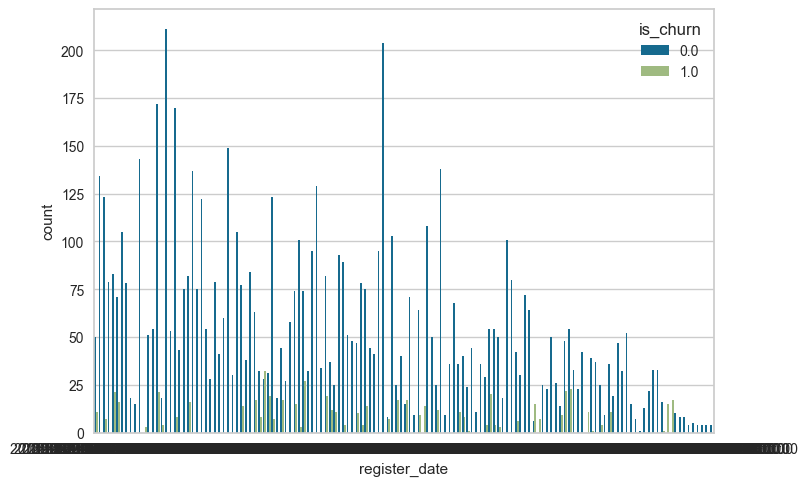

In [36]:
sns.countplot(data = df.query('churn_moment == True'), x = 'register_date', hue = 'is_churn')

In [42]:
df_line = df.query('churn_moment == True').groupby(['register_date', 'is_churn'], as_index = False)['customer_code'].count()

<Axes: xlabel='register_date', ylabel='customer_code'>

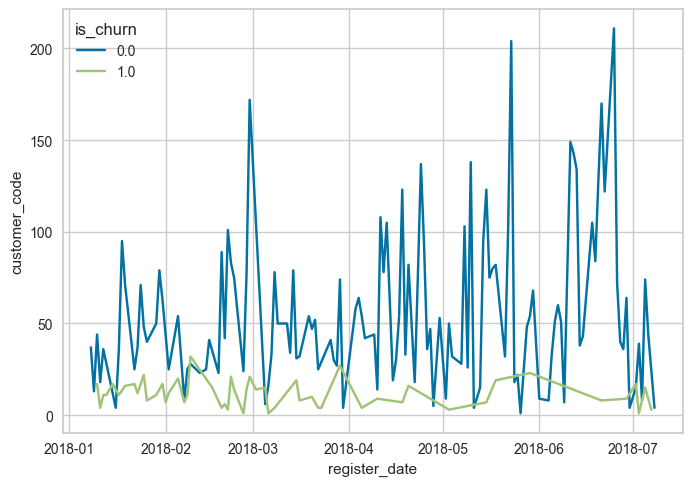

In [48]:
sns.lineplot(data = df_line.query('register_date > "2018-01-01 00:00:00+00:00"') , x = 'register_date', y = 'customer_code', hue = 'is_churn')

In [57]:
df.groupby(['group_code', 'segment_code'])['customer_code'].count()

group_code  segment_code
0           0               150223
            1                 2303
            3                  178
            4                 4878
            5                10566
            6                 2016
1           3                 7646
2           2                24703
Name: customer_code, dtype: int64

In [66]:
df[(df['register_date'] < '2018-01-01 00:00:00+00:00') & (df['is_churn'] == 1)].count()

customer_code       36291
branch_id           36291
sales_channel       36291
seller_code         36291
register_date       36291
total_price         36291
order_id            36291
quantity            36291
item_code           36291
item_total_price    36291
unit_price          36291
group_code          36291
segment_code        36291
is_churn            36291
churn_moment        36291
dtype: int64

## Modeling

### Processing

In [119]:
regression = setup(data = df, target = 'is_churn', session_id = 42, 
                   ignore_features = ['customer_code', 'branch_id', 'seller_code', 'order_id'], 
                   date_features = ['register_date'], remove_outliers = True)

,Description,Value
0,Session id,42
1,Target,is_churn
2,Target type,Binary
3,Original data shape,"(202513, 15)"
4,Transformed data shape,"(195425, 13)"
5,Transformed train set shape,"(134671, 13)"
6,Transformed test set shape,"(60754, 13)"
7,Ignore features,4
8,Numeric features,8
9,Date features,1


In [19]:
get_config('X_train_transformed')

,sales_channel,register_date_year,register_date_month,register_date_day,total_price,quantity,item_code,item_total_price,unit_price,group_code,segment_code
171916,1.740434,1.439260,-0.077250,1.477066,-0.228786,-0.043232,1.368562,-0.210950,-0.283688,2.574349,0.803468
47963,1.407784,0.430935,1.692824,-0.350121,-0.179280,-0.172827,-1.273762,-0.212600,-0.150274,-0.421445,-0.522795
152203,1.407784,0.767043,-0.962287,1.233441,0.076738,0.141904,1.318853,0.033811,-0.218727,-0.421445,-0.522795
117560,-0.588116,0.430935,0.512775,0.380753,-0.145855,-0.172827,1.565190,-0.222496,-0.178572,-0.421445,-0.522795
143934,-0.588116,-0.241281,0.217762,0.137128,-0.049895,-0.006205,0.582051,-0.175306,-0.270594,-0.421445,-0.522795
...,...,...,...,...,...,...,...,...,...,...,...
121019,1.407784,0.430935,1.102799,1.233441,-0.136379,-0.154314,0.447283,-0.233146,-0.254372,-0.421445,-0.522795
104684,-0.255466,-0.913497,0.217762,0.989816,-0.212421,-0.117287,1.315539,-0.080191,-0.076148,-0.421445,-0.522795
133181,-0.588116,1.103152,1.692824,0.258941,-0.109736,-0.117287,1.312225,-0.179349,-0.209561,-0.421445,2.129732
148241,-0.588116,1.439260,-1.552311,-0.106496,-0.192362,-0.191341,-0.033240,-0.243862,-0.196685,-0.421445,-0.522795


### Model validation

In [ ]:
best_model = compare_models()

### Graphical Analysis

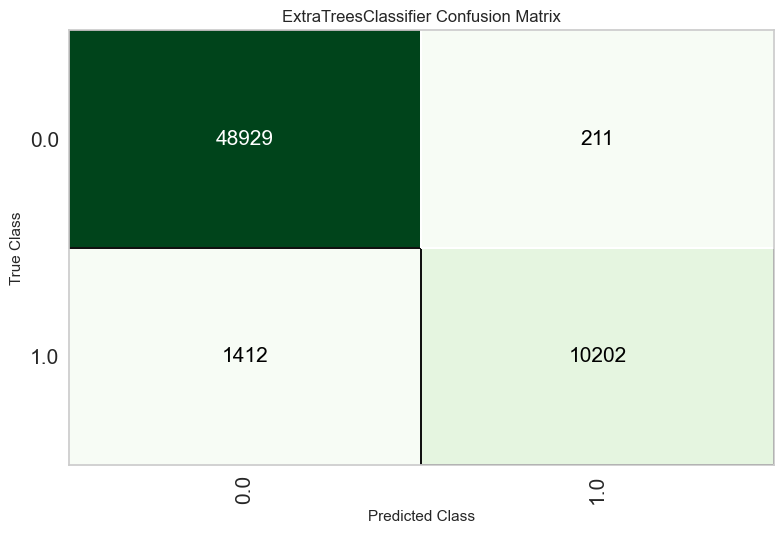

In [53]:
plot_model(best_model, plot = 'confusion_matrix')

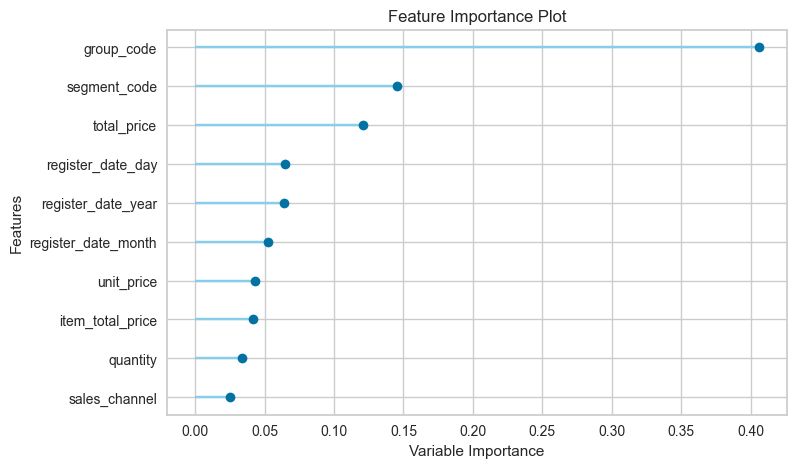

In [72]:
plot_model(best_model, plot='feature')

## Report

**Pycaret com data corrigida - Extra Trees Classifier: Accuracy - 0.9712, Recall - 0.8696, Prec. - 0.9772**

**Pycaret com data corrigida e normalização - Extra Trees Classifier: Accuracy - 0.9712, Recall - 0.8696, Prec. - 0.9772**

**Pycaret com data corrigida e sem colunas de Group Code e Segment Code - Extra Trees Classifier: Accuracy - 0.9510,
Recall - 0.7752, Prec. - 0.9610**

**Pycaret com data corrigida e sem coluna de Item Code - Extra Trees Classifier: Accuracy - 0.9760, Recall - 0.8930, Prec. - 0.9799**